<a href="https://colab.research.google.com/github/GeoLinkCoding/EarthResources_DataScience/blob/main/Unsupervised/Unsupervised_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

The data for this project conists of 16 drill holes from the Pilbara Craton in Western Australia. Each drill hole was subject to short wave infrared (SWIR) and thermal infrared (TIR) measurements. Spectral unmixing algorithms were used to automatically quantify relative abundaces of minerals from both SWIR and TIR along the depth of each drill hole. There are 51 features in the dataset which will make analysis tricky but exploring the data will direct any changes that can be made to make it more manageable.

### Example Metadata:

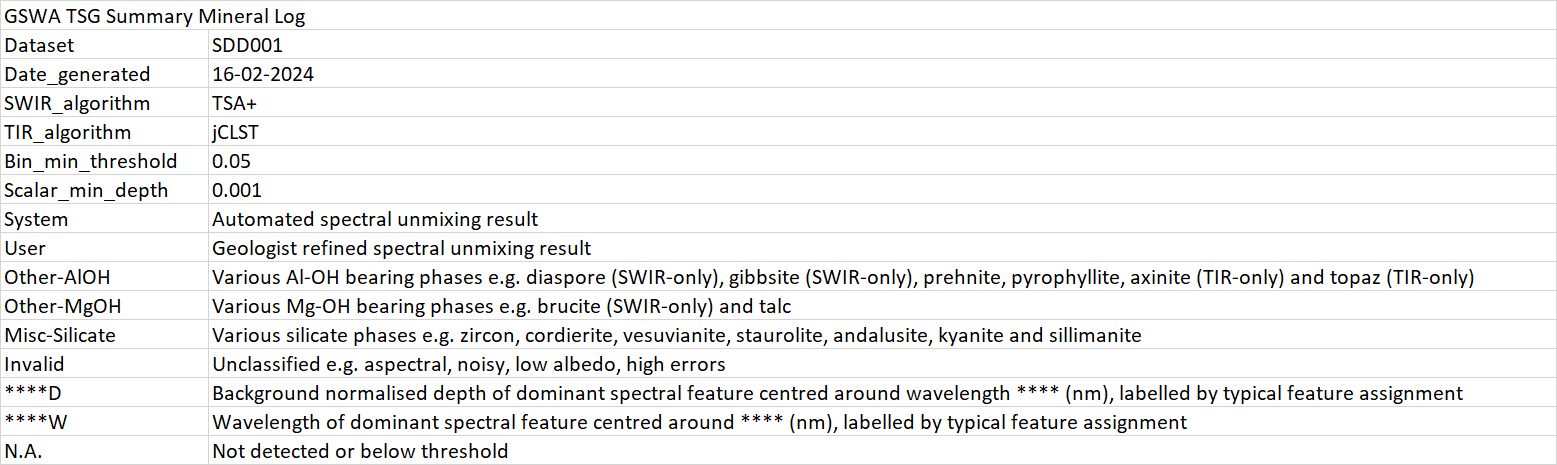

### Load data:

In [1]:
!git clone https://github.com/GeoLinkCoding/EarthResources_DataScience.git

Cloning into 'EarthResources_DataScience'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 43 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (43/43), 7.45 MiB | 13.97 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [2]:
import os
os.chdir('/content/EarthResources_DataScience/Unsupervised/Data')
import pandas as pd
import glob

csv_files = glob.glob("*.csv")
print('File names:')
for file in csv_files:
  print(file)

File names:
SM_ABDP10.csv
SM_DD93CG06.csv
SM_ABDP5B.csv
SM_ND14DD-001.csv
SM_PDP1.csv
SM_DD93CG07.csv
SM_13AHDD005.csv
SM_ABDP3.csv
SM_13CGDD001.csv
SM_RHDH2A.csv
SM_AIDP2.csv
SM_ABDP5.csv
SM_BUDD0036.csv
SM_DD93CG05.csv
SM_ABDP4.csv
SM_SDD001.csv


In [3]:
import pandas as pd
print("File shapes:")
sum = 0
for file in csv_files:
  df = pd.read_csv(file,skiprows=16)
  print(df.shape)
  sum += df.shape[0]
print('Total rows:',sum)
print(df.head(2))

File shapes:
(208, 51)
(220, 51)
(15, 51)
(964, 51)
(104, 51)
(213, 51)
(222, 51)
(148, 51)
(430, 51)
(415, 51)
(329, 51)
(195, 51)
(456, 51)
(232, 51)
(194, 51)
(595, 51)
Total rows: 4940
   Depth_from_(m)  Depth_to_(m) Kaolin_(System_SWIR)  \
0             0.0           1.0            0.3349629   
1             1.0           2.0            0.0166301   

   White-Mica_(System_SWIR) Smectite_(System_SWIR) Other-AlOH_(System_SWIR)  \
0                  0.641421                   N.A.                     N.A.   
1                  0.662528              0.0148739                     N.A.   

  Chlorite_(System_SWIR) Dark-Mica_(System_SWIR) Amphibole_(System_SWIR)  \
0              0.0236162                    N.A.                    N.A.   
1              0.2944998                    N.A.                    N.A.   

  Serpentine_(System_SWIR)  ... Epidote_(System_TIR) Tourmaline_(System_TIR)  \
0                     N.A.  ...                 N.A.                    N.A.   
1              

### Data Engineering:

Here we'll read each file into a pandas DataFrame and combine them into one dataset. Next we will need to take care of missing values. Each depth range (depth_from to depth_to) only has a few minerals that are detected from SWIR and TIR. Total measurements from all SWIR abundances add to one, as is the same for TIR abundances. "N.A." results are from minerals with abundances low enough they are neglagible so we can set these values to zero.

In [4]:
# read and combine dataframes
dataframes = []
for file in csv_files:
  df = pd.read_csv(file,skiprows=16)
  df['filename'] = file[:-4]
  dataframes.append(df)
df_combined = pd.concat(dataframes).set_index('filename',append=True)

In [5]:
# fill N.A. values
df_filled = df_combined.replace("N.A.",0)
df_filled.head()

<ipython-input-5-ffababf4d1c5>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filled = df_combined.replace("N.A.",0)


Depth_from_(m)  Depth_to_(m) Kaolin_(System_SWIR)  \
  filename                                                       
0 SM_ABDP10             0.0           1.0            0.0177073   
1 SM_ABDP10             1.0           2.0            0.0023436   
2 SM_ABDP10             2.0           3.0                    0   
3 SM_ABDP10             3.0           4.0            0.0027994   
4 SM_ABDP10             4.0           5.0                    0   

            White-Mica_(System_SWIR) Smectite_(System_SWIR)  \
  filename                                                    
0 SM_ABDP10                        0              0.6330374   
1 SM_ABDP10                0.0421611               0.485852   
2 SM_ABDP10                        0              0.2265198   
3 SM_ABDP10                        0              0.6559526   
4 SM_ABDP10                        0              0.6237643   

            Other-AlOH_(System_SWIR) Chlorite_(System_SWIR)  \
  filename                                                    
0 SM_ABDP10                        0              0.0025333   
1 SM_ABDP10                0.0068641               0.064535   
2 SM_ABDP10                        0              0.4364435   
3 SM_ABDP10                        0              0.1430051   
4 SM_ABDP10                        0              0.0583234   

            Dark-Mica_(System_SWIR) Amphibole_(System_SWIR)  \
  filename                                                    
0 SM_ABDP10               0.0022219                       0   
1 SM_ABDP10               0.0167431                       0   
2 SM_ABDP10                       0                       0   
3 SM_ABDP10               0.0048495                       0   
4 SM_ABDP10               0.0159142                       0   

            Serpentine_(System_SWIR)  ... Epidote_(System_TIR)  \
  filename                            ...                        
0 SM_ABDP10                        0  ...                    0   
1 SM_ABDP10                        0  ...            0.0047189   
2 SM_ABDP10                0.0034959  ...                    0   
3 SM_ABDP10                        0  ...                    0   
4 SM_ABDP10                        0  ...                    0   

            Tourmaline_(System_TIR) Carbonate_(System_TIR)  \
  filename                                                   
0 SM_ABDP10                       0              0.0976422   
1 SM_ABDP10                       0               0.059129   
2 SM_ABDP10                       0              0.0385286   
3 SM_ABDP10                       0              0.0155924   
4 SM_ABDP10                       0              0.0428709   

            Sulphate_(System_TIR) Phosphate_(System_TIR) Oxide_(System_TIR)  \
  filename                                                                    
0 SM_ABDP10                     0                      0                  0   
1 SM_ABDP10                     0                      0                  0   
2 SM_ABDP10                     0                      0                  0   
3 SM_ABDP10                     0                      0                  0   
4 SM_ABDP10                     0                      0                  0   

             INVALID_(System_TIR) 8625D_Quartz 11300D_Carbonate  \
  filename                                                        
0 SM_ABDP10               0.00813     0.047806          0.00355   
1 SM_ABDP10                     0     0.089037         0.003461   
2 SM_ABDP10             0.0350877     0.090287         0.006337   
3 SM_ABDP10              0.015873     0.053679          0.00163   
4 SM_ABDP10                     0     0.061132         0.001894   

             11300W_Carbonate  
  filename                     
0 SM_ABDP10         11400.692  
1 SM_ABDP10         11418.421  
2 SM_ABDP10         11437.963  
3 SM_ABDP10         11531.748  
4 SM_ABDP10         11494.543  

[5 rows x 51 columns]

In [6]:
# make all columns numeric
non_numeric_cols = df_filled.select_dtypes(exclude=['number']).columns
for col in non_numeric_cols:
  df_filled[col] = pd.to_numeric(df_filled[col],errors='coerce')

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

df_filled.describe().T

count          mean         std          min           25%  \
Depth_from_(m)              4940.0    251.595749  207.117452     0.000000     99.000000   
Depth_to_(m)                4940.0    252.595749  207.117452     1.000000    100.000000   
Kaolin_(System_SWIR)        4940.0      0.005362    0.037353     0.000000      0.000000   
White-Mica_(System_SWIR)    4940.0      0.303334    0.324882     0.000000      0.000000   
Smectite_(System_SWIR)      4940.0      0.013627    0.046264     0.000000      0.000000   
Other-AlOH_(System_SWIR)    4940.0      0.002447    0.007287     0.000000      0.000000   
Chlorite_(System_SWIR)      4940.0      0.279962    0.322636     0.000000      0.003573   
Dark-Mica_(System_SWIR)     4940.0      0.006084    0.024938     0.000000      0.000000   
Amphibole_(System_SWIR)     4940.0      0.014672    0.077289     0.000000      0.000000   
Serpentine_(System_SWIR)    4940.0      0.000926    0.003887     0.000000      0.000000   
Other-MgOH_(System_SWIR)    4940.0      0.000470    0.003851     0.000000      0.000000   
Epidote_(System_SWIR)       4940.0      0.004429    0.017798     0.000000      0.000000   
Tourmaline_(System_SWIR)    4940.0      0.004031    0.010960     0.000000      0.000000   
Carbonate_(System_SWIR)     4940.0      0.082208    0.153748     0.000000      0.003634   
Sulphate_(System_SWIR)      4940.0      0.018543    0.088231     0.000000      0.000000   
Invalid_(System_SWIR)       4940.0      0.263702    0.350364     0.000000      0.000000   
VIS-SWIR_Albedo             4940.0      0.155250    0.064721     0.024043      0.111545   
900D_Fe                     4940.0      0.034820    0.023489     0.000000      0.022992   
900W_Fe                     4940.0    714.526569  374.045133     0.000000    882.028012   
1900D_Water_Fe              4940.0      0.026402    0.029680     0.001378      0.008492   
2200D_AlOH                  4940.0      0.109914    0.136444     0.001711      0.016666   
2200W_AlOH                  4940.0   2195.125753   10.124830  2144.800200   2189.445250   
2250D_FeOH                  4940.0      0.037794    0.039987     0.001658      0.009320   
2250W_FeOH                  4940.0   2254.813237    3.058290  2243.090800   2253.426025   
Misc-Silicate_(System_TIR)  4940.0      0.000000    0.000000     0.000000      0.000000   
Silica_(System_TIR)         4940.0      0.505557    0.261278     0.000000      0.346414   
K-Feldspar_(System_TIR)     4940.0      0.020387    0.043928     0.000000      0.000000   
Plagioclase_(System_TIR)    4940.0      0.095134    0.149353     0.000000      0.000000   
Garnet_(System_TIR)         4940.0      0.000163    0.002556     0.000000      0.000000   
Pyroxene_(System_TIR)       4940.0      0.008163    0.042896     0.000000      0.000000   
Olivine_(System_TIR)        4940.0      0.001024    0.005468     0.000000      0.000000   
Zeolite_(System_TIR)        4940.0      0.000000    0.000000     0.000000      0.000000   
Kaolin_(System_TIR)         4940.0      0.002895    0.024900     0.000000      0.000000   
White-Mica_(System_TIR)     4940.0      0.107966    0.109392     0.000000      0.000844   
Smectite_(System_TIR)       4940.0      0.010558    0.038464     0.000000      0.000000   
Other-AlOH_(System_TIR)     4940.0      0.002132    0.009502     0.000000      0.000000   
Chlorite_(System_TIR)       4940.0      0.074906    0.124574     0.000000      0.000259   
Dark-Mica_(System_TIR)      4940.0      0.006410    0.016535     0.000000      0.000000   
Amphibole_(System_TIR)      4940.0      0.017925    0.081856     0.000000      0.000000   
Serpentine_(System_TIR)     4940.0      0.001337    0.006242     0.000000      0.000000   
Other-MgOH_(System_TIR)     4940.0      0.004217    0.020778     0.000000      0.000000   
Epidote_(System_TIR)        4940.0      0.000826    0.006624     0.000000      0.000000   
Tourmaline_(System_TIR)     4940.0      0.000000    0.000000     0.000000      0.000000   
Carbonate_(System_TIR)   

From the statistics above we see there are several features with a min and max of 0, so we can drop these from the dataset. The features with "System_SWIR or TIR" are relative abundances and what we care about for the purpose of the project so all other measurements will also be dropped. Finally, we only need one of the two depth features, we'll keep depth_from.

In [8]:
# drop unneeded columns
col = df_filled.columns.tolist()
swir_num = [i for i in range(2,16)]
tir_num = [i for i in range(24,48)]
itors = swir_num + tir_num
good_cols = [col[c] for c in itors]
good_cols.append('Depth_from_(m)')
bad_cols = [c for c in col if c not in good_cols]
df_drop = df_filled.drop(columns=bad_cols)
df_drop = df_drop.drop(columns=['Misc-Silicate_(System_TIR)','Zeolite_(System_TIR)','Tourmaline_(System_TIR)'])

### Correlations:

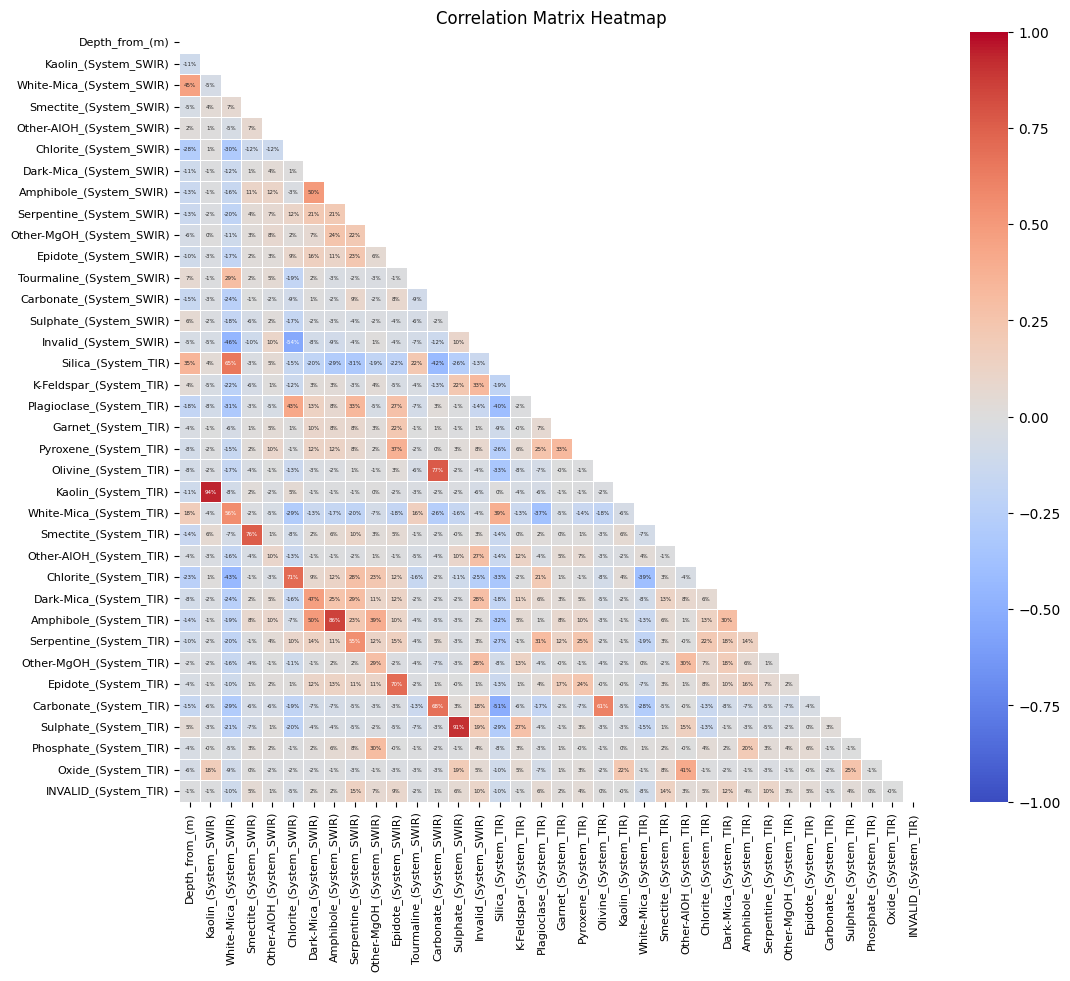

In [9]:
# create heatmap
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df_drop.corr()

# Mask to hide upper triangle for cleaner visualization
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap
sns.reset_defaults()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt='.0%', linewidths=0.5, annot_kws={"size": 4}, vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap',fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [10]:
# list high correlations
filtered_corr = corr_matrix[((corr_matrix >= 0.5) | (corr_matrix <= -0.5)) & (corr_matrix != 1)]
stacked_corr = filtered_corr.stack().reset_index()
stacked_corr.columns = ['row', 'column', 'correlation']
stacked_corr['sorted_cols'] = stacked_corr.apply(lambda row: tuple(sorted((row['row'], row['column']))), axis=1)
filtered_stacked_corr = stacked_corr.drop_duplicates(subset=['sorted_cols'])
filtered_stacked_corr = filtered_stacked_corr.drop(columns=['sorted_cols'])
sorted_corr = filtered_stacked_corr.sort_values(by=['correlation'], ascending=False)
print('Positive/Negative Correlations > 50%:')
print(sorted_corr)

Positive/Negative Correlations > 50%:
                         row                   column  correlation
0       Kaolin_(System_SWIR)      Kaolin_(System_TIR)     0.937536
11    Sulphate_(System_SWIR)    Sulphate_(System_TIR)     0.907416
6    Amphibole_(System_SWIR)   Amphibole_(System_TIR)     0.857962
9    Carbonate_(System_SWIR)     Olivine_(System_TIR)     0.768373
3     Smectite_(System_SWIR)    Smectite_(System_TIR)     0.762380
5     Chlorite_(System_SWIR)    Chlorite_(System_TIR)     0.707861
8      Epidote_(System_SWIR)     Epidote_(System_TIR)     0.703885
10   Carbonate_(System_SWIR)   Carbonate_(System_TIR)     0.681285
1   White-Mica_(System_SWIR)      Silica_(System_TIR)     0.653700
16      Olivine_(System_TIR)   Carbonate_(System_TIR)     0.611793
2   White-Mica_(System_SWIR)  White-Mica_(System_TIR)     0.556866
7   Serpentine_(System_SWIR)  Serpentine_(System_TIR)     0.548027
14       Silica_(System_TIR)   Carbonate_(System_TIR)    -0.513267
4     Chlorite_(System_S

The above correlations are mostly obvious: kaolin, sulphate, amphibole, etc detected through SWIR and TIR will correlate. Intersting observations include Olivine and Carbonate abundances which are fairly correlated even with chemical structures of $(Mg,Fe)_{2}SiO_{4}$ and $(CO_{3})^{2-}$ respectively. White-Mica and Silica are another fairly correlated pair, where Mica's usually have some form of silicate constituants. Inversely correlated pairs include Silicates and Carbonates where an increase in one generally correlates to a decrease in the other. The same pattern is seen between Chlorites and unclassified minerals.

### Distributions:

In [11]:
# split dataset
col = df_drop.columns.tolist()
swir_num = [i for i in range(1,15)]
swir = [col[c] for c in swir_num]

tir_num = [i for i in range(15,36)]
tir = [col[c] for c in tir_num]

df_swir = df_drop[swir]
df_tir = df_drop[tir]

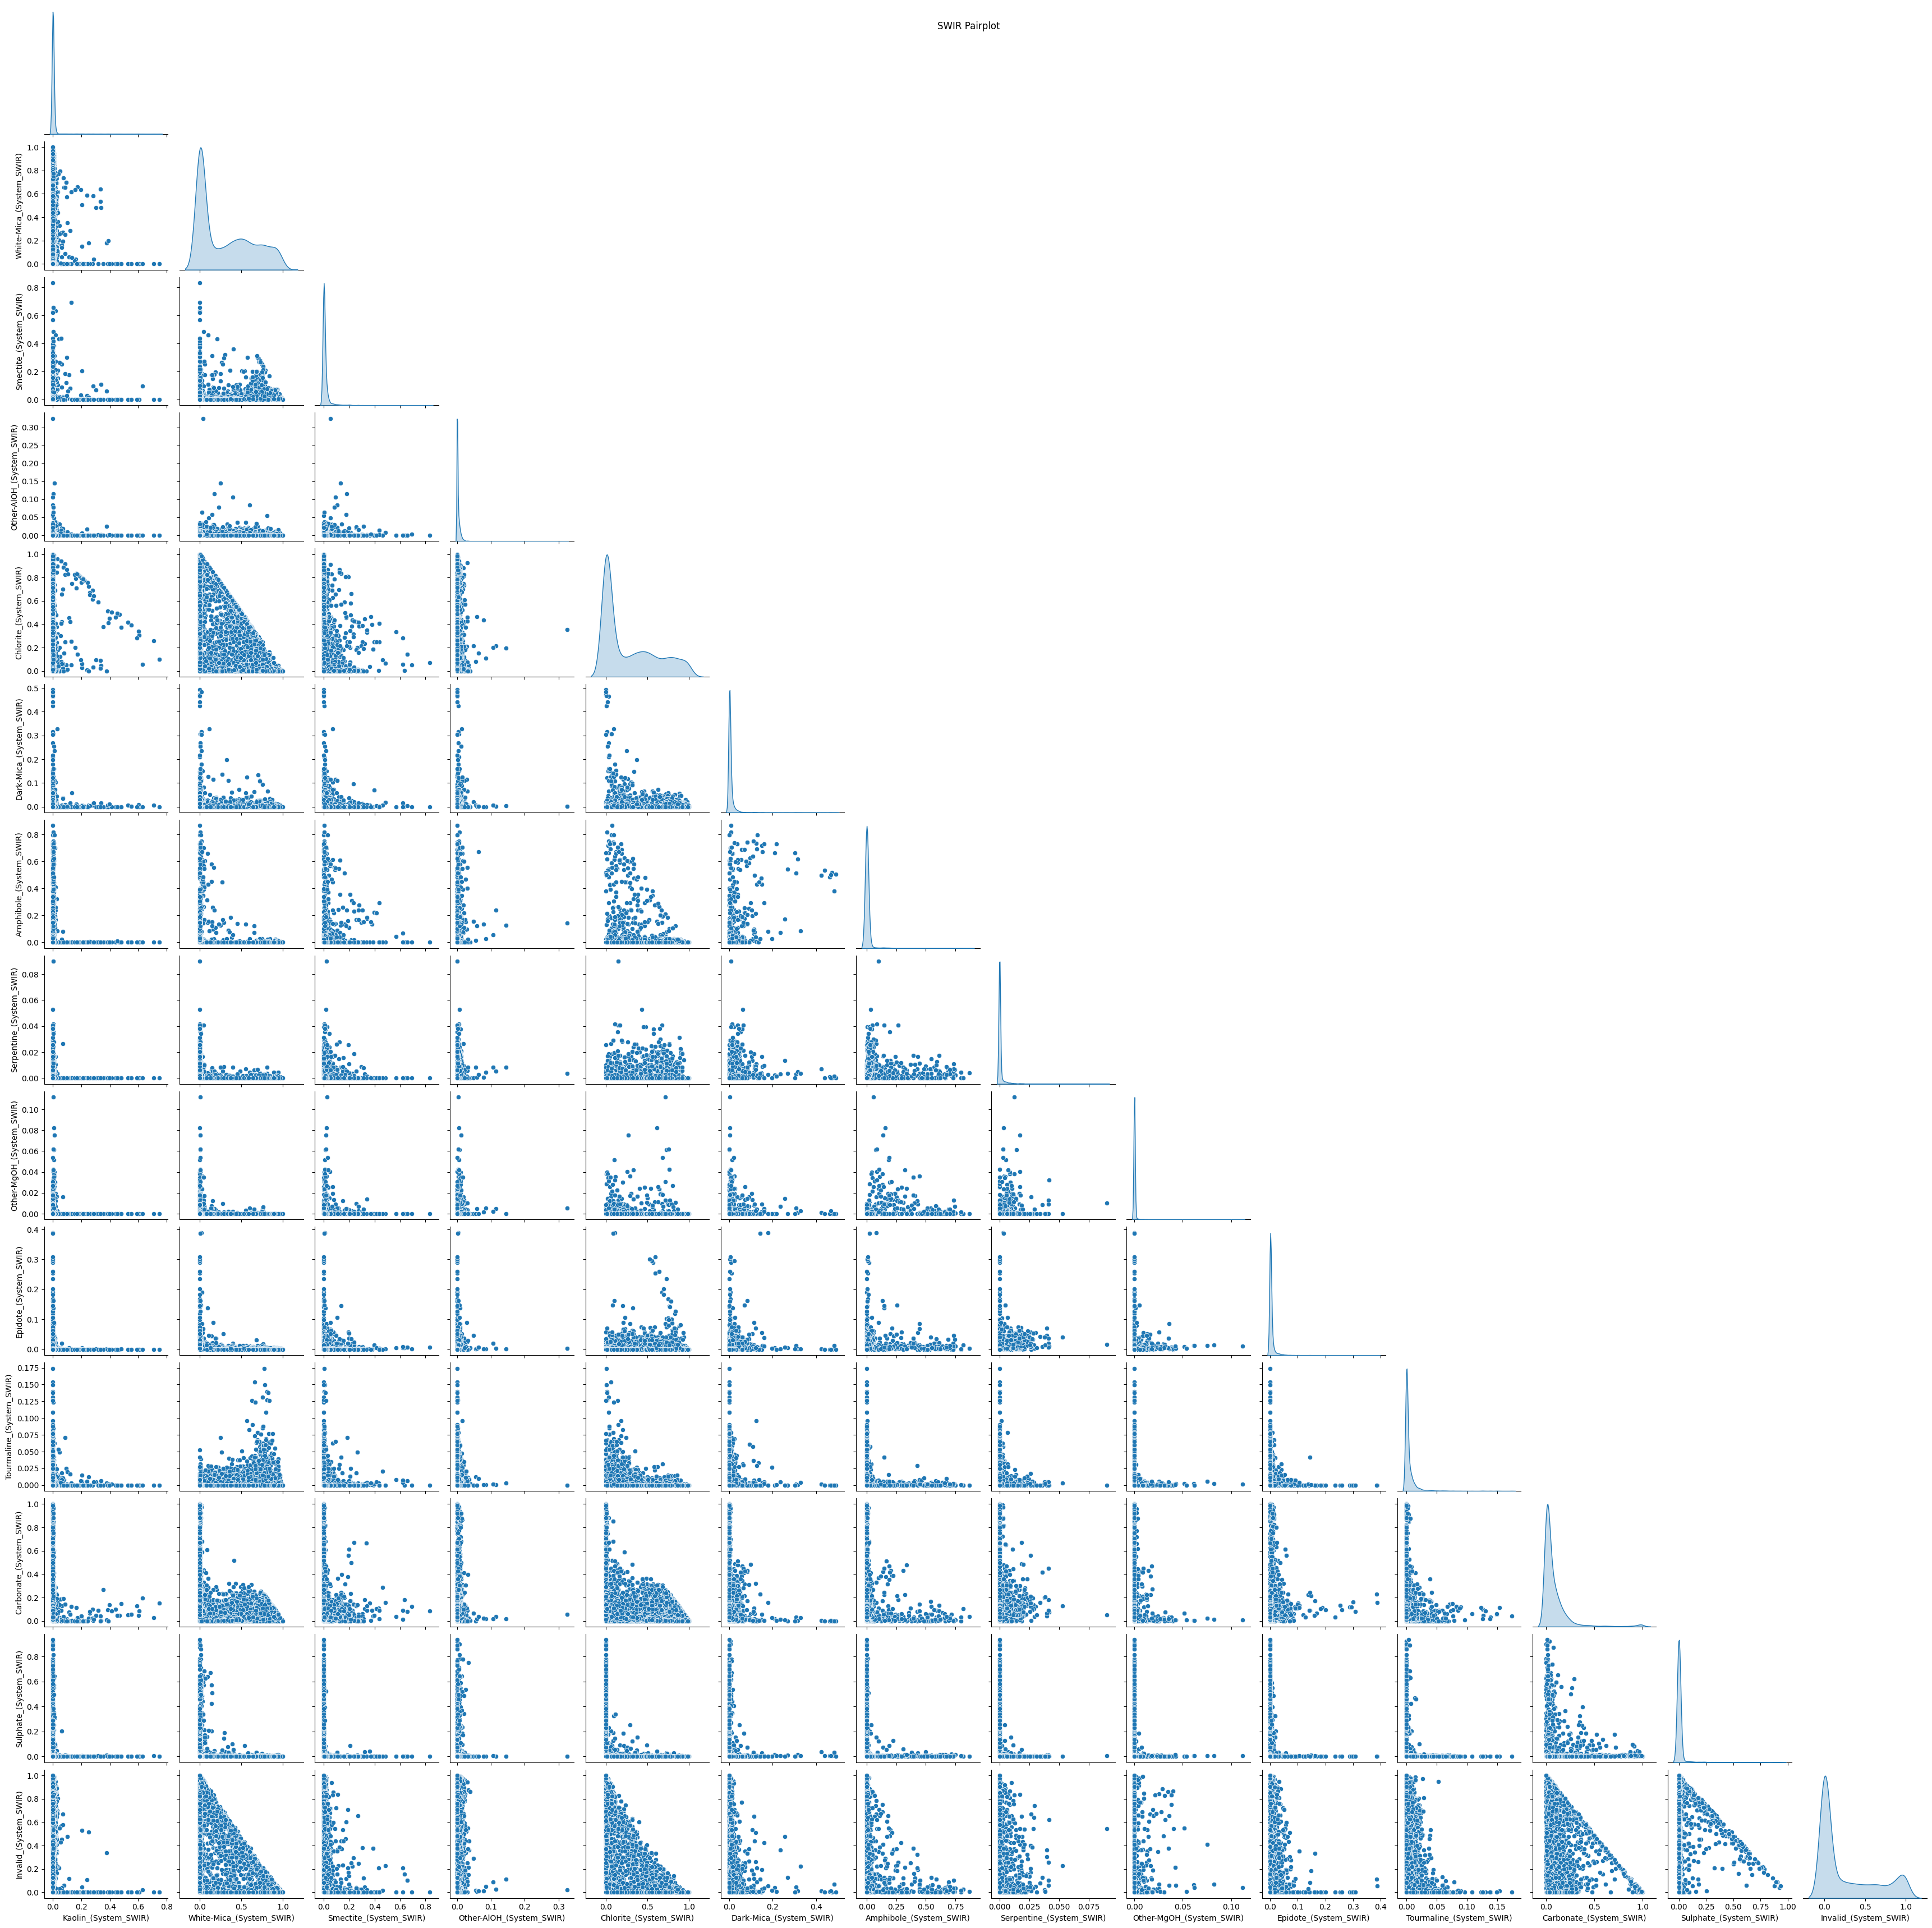

In [12]:
# swir pairplot
pp = sns.pairplot(df_swir, diag_kind='kde', corner=True)  # 'corner=True' shows only lower triangle
pp.fig.suptitle('SWIR Pairplot')
plt.show()

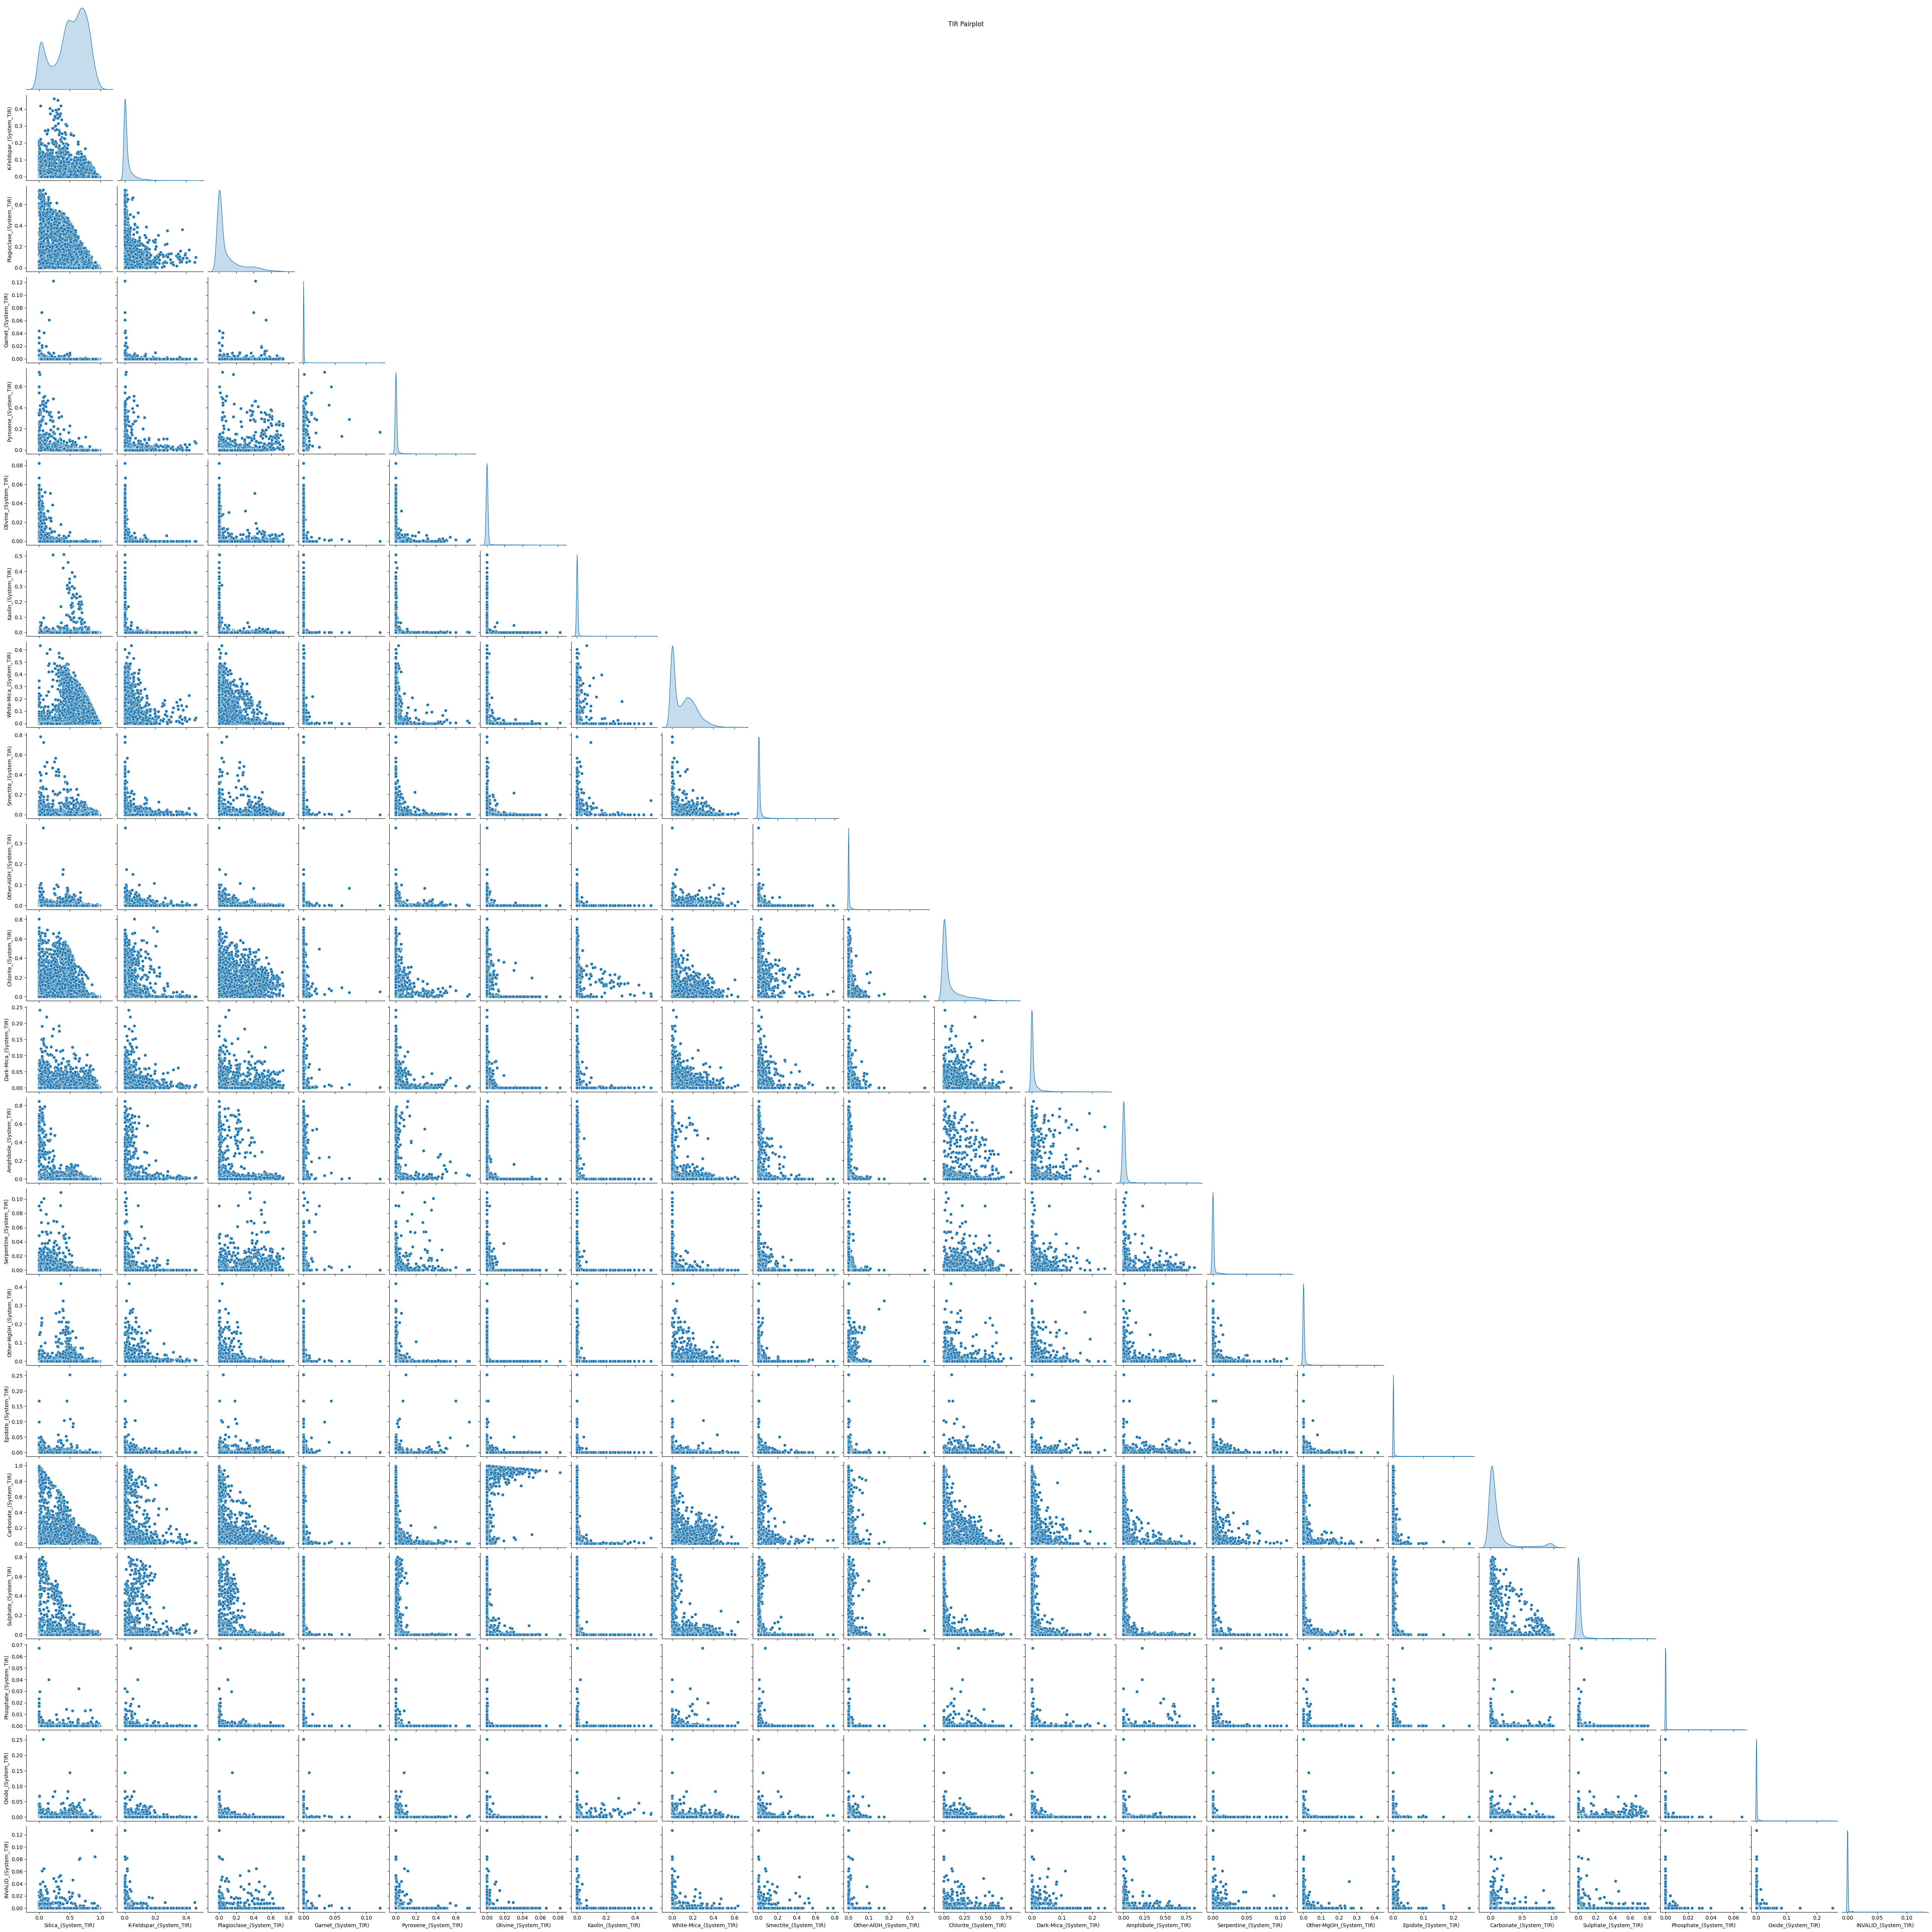

In [13]:
# tir pairplot
pp = sns.pairplot(df_tir, diag_kind='kde', corner=True)  # 'corner=True' shows only lower triangle
pp.fig.suptitle('TIR Pairplot')
plt.show()

From the two pairplots, broken up by spectral type, most minerals have small or negligible abundances but there are a few with meaningful distributions meaning they are more abundant between all 16 columns. White-mica, chlorite, carbonate, silica, plagioclase, and unclassified are the more abundant minerals.

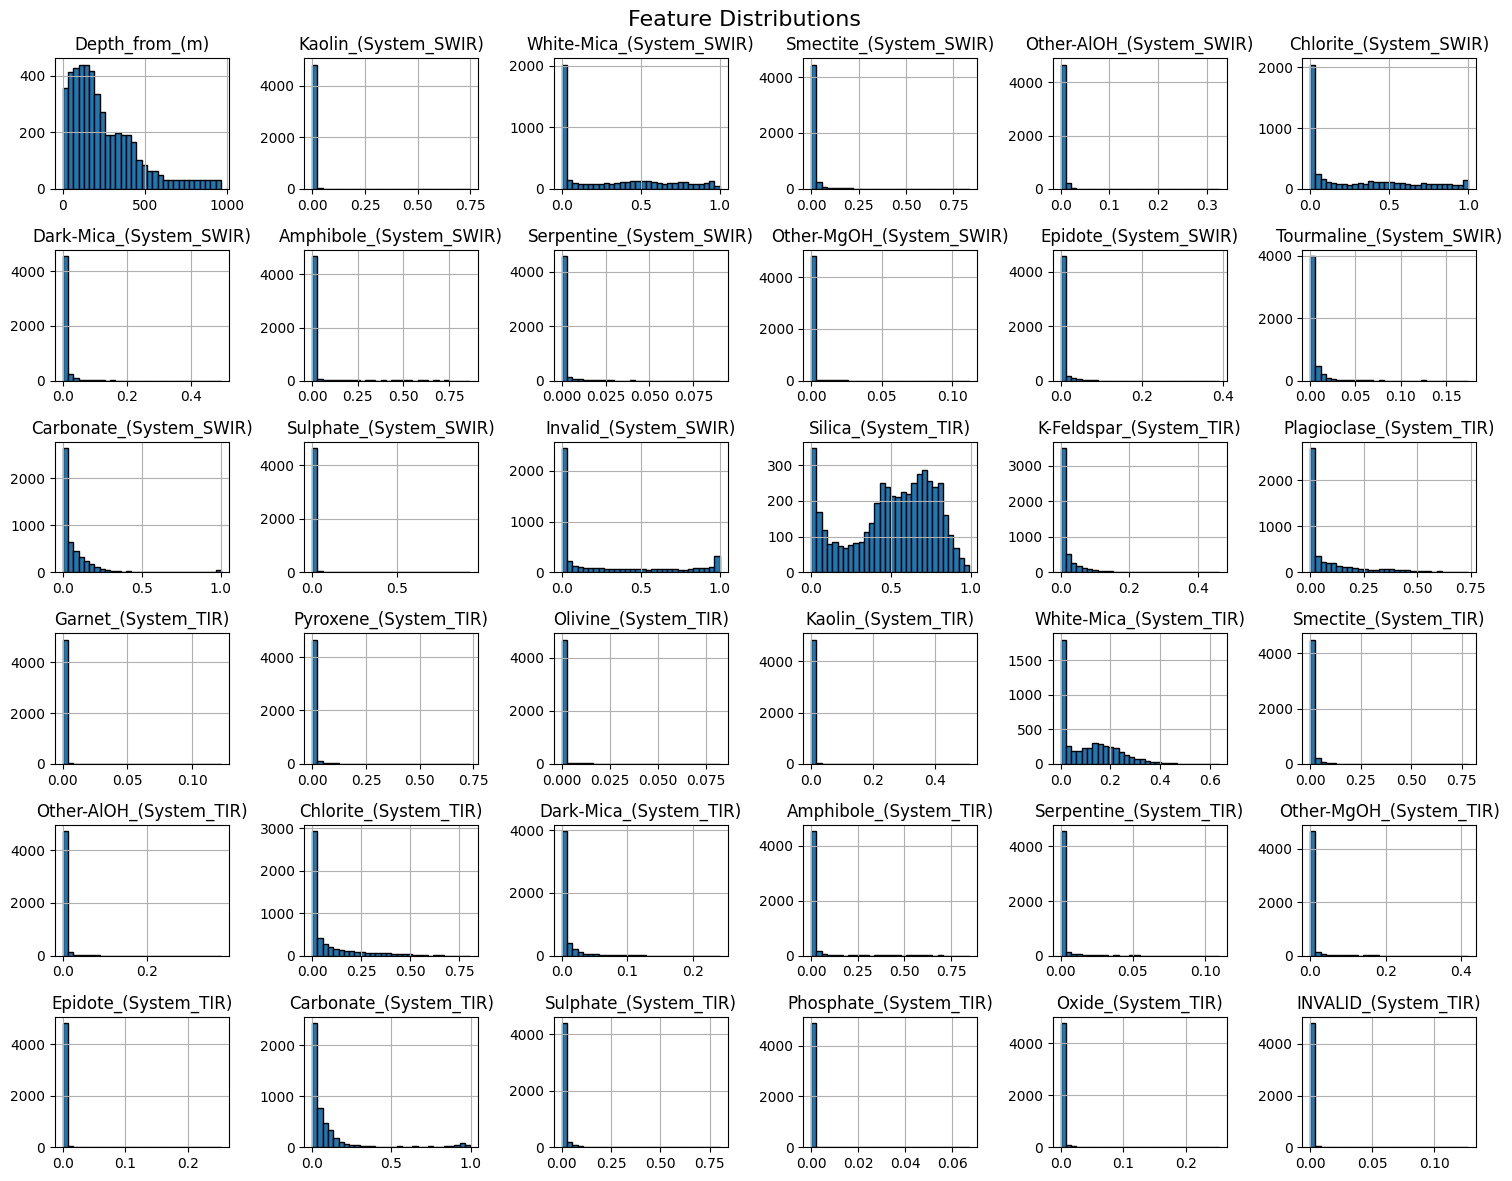

In [14]:
# histogram
df_drop.hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

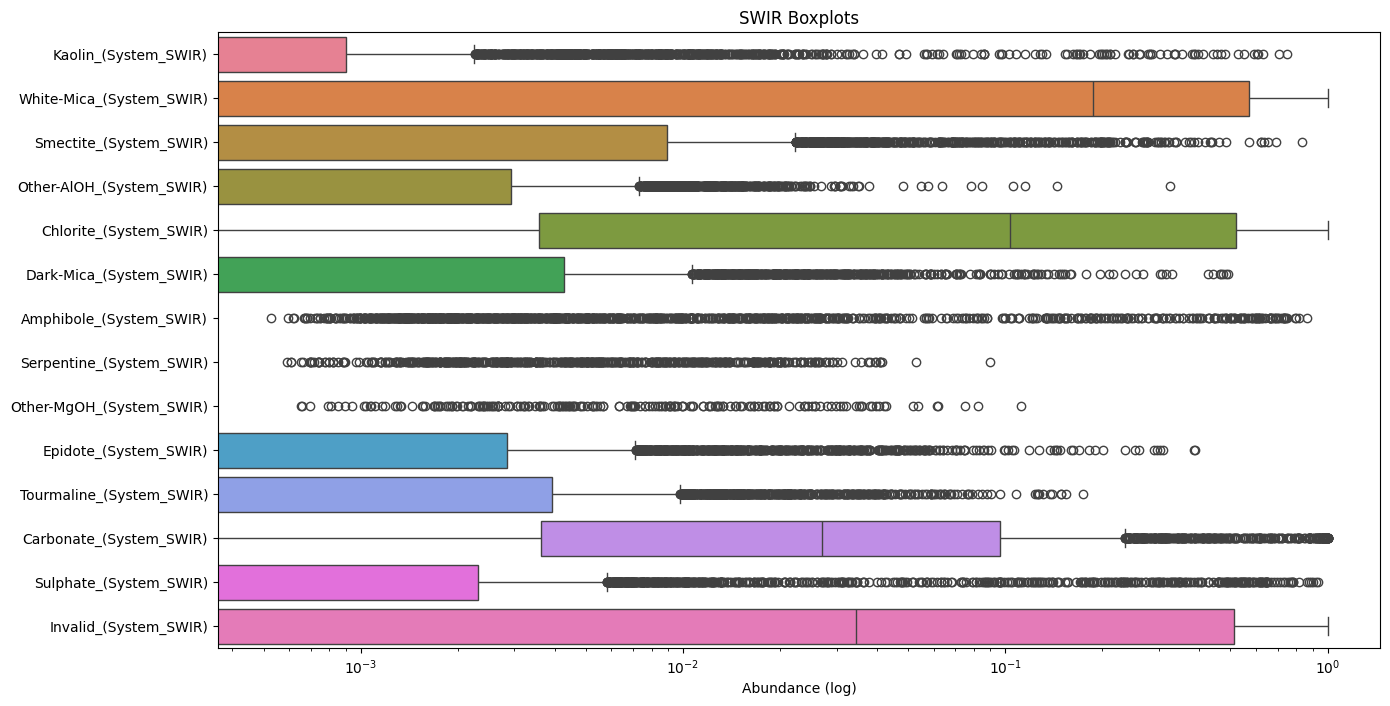

In [19]:
# swir boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_swir, orient='h')
plt.title("SWIR Boxplots")
plt.xscale('log')
plt.xlabel('Abundance (log)')
plt.show()

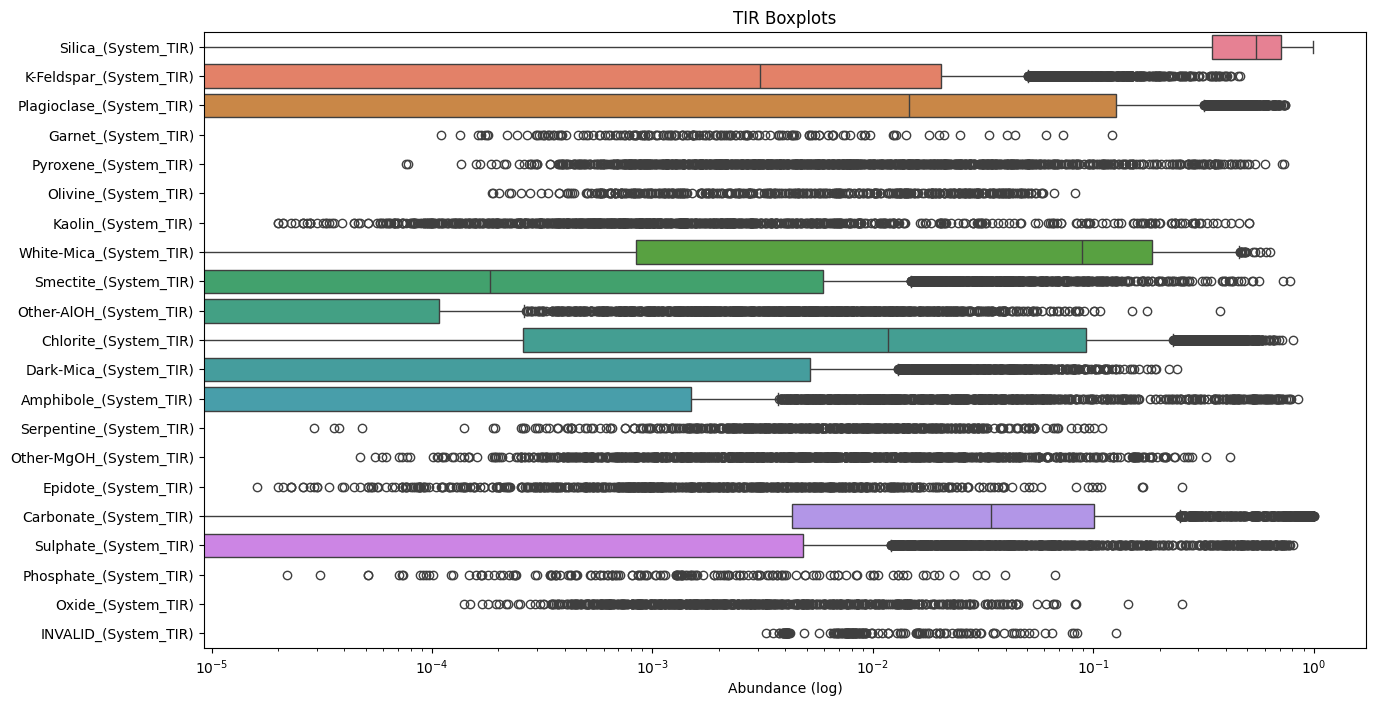

In [22]:
# swir boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_tir, orient='h')
plt.title("TIR Boxplots")
plt.xscale('log')
plt.xlabel('Abundance (log)')
plt.show()

The final three plots show distributions of the data in different ways. The boxplots are logarithmic scale and thus show distribution of the lesser abundant minerals better than all the previous.

This data only has close to 5000 data points but still has many features, 35 mineral abundances and depth. The purpose of this project is to explore relationships and patterns between these minerals within the Pilbara Craton. Dimensionality reduction will likely bring the most clarity to patterns unrecognized through correlations, and clustering, both with all features and reduced, will provide supplimental understanding through several well tuned models.